In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#imports para el ejecricio nuevo de forest !, van estos dos, ya lo tenia del ejercicio anterior.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier #para este ejemplo usamos este
#from sklearn.model_selection import train_test_split
from sklearn import metrics

Predicting Titanic survival using Random Forest

We need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). To be able to predict which passengers were more likely to survive we will use Random Forest to train the model.

Step 1:

The dataset can be found in this project folder as 'titanic_train.csv' file. You are welcome to load it directly from the link (https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv), or to download it and add it to your data/raw folder. In that case, don't forget to add the data folder to the .gitignore file.

Time to work on it!

Step 2:

Explore and clean the data.

Step 3:

Build a first predictive model using Random Forest. Chose an evaluation metric and then optimize your model hyperparameters.

Step 4:

Use the app.py to create your pipeline.

Step 5:

To save your model and be able to use it later use the following code:


import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
In your README file write a brief summary.



In [15]:
#Step 1

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv')

#pd.set_option('display.max_columns',110)

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Step 2

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S


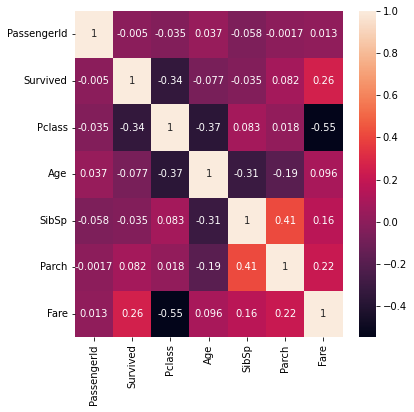

In [12]:
#Hacemos el EDA para ver q hacemos
#Step 2
#armo un correlation matrix   , mapa de calor
plt.figure(figsize=(6,6))
corr_matrix = df.corr()
hit_map = sns.heatmap(corr_matrix,annot=True)
plt.show()

In [18]:
#queremos predicir la var survived
print(df['Survived'].value_counts()) #esto nos dice si esta balanceado o no

print(df['Survived'].value_counts()/len(df['Survived'])) #hay un pequeño desbalance, tengo q usar una metrica mas adecuada y no el acuracy

#arranco las categoricas, por ej Name

#este da dos campos tiene 0 y 1 , usamos clasificacion binaria, decision tree, logistin regression

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [20]:
df['Name']
df['Name'].nunique() #todos los nombres son diferentes, se puede sacar porq son todos diferetes

891

In [21]:
df=df.drop(columns=['Name'])

In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [24]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [26]:
df['Ticket'].value_counts()

df['Ticket'].nunique() #esta no tiene sentido la borro, porq ? no me quedo claro, no se entendio la explicacion!


681

In [27]:
df=df.drop(columns=['Ticket'])

In [29]:
df['Cabin'].value_counts() #este tambien lo omitimos, no hay muchos dif, 147 var categoriacas
df['Cabin'].nunique()

147

In [30]:
df=df.drop(columns=['Cabin'])

In [31]:
df.info() #saco las variables q no aportan para q no falle el arbol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [32]:
df['Embarked'] = df['Embarked'].map({'S':2,'C':1,'Q':0})
df['Embarked']

0      2.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    1.0
890    0.0
Name: Embarked, Length: 891, dtype: float64

In [33]:
df.info() #quedo todo numerico ! ahora divido train y test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [6]:
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [41]:
#df['Age'].mean()
#df['Age'](np.isnan(df['Age'])]=df['Age'].mean()
df['Age'][np.isnan(df['Age'])]=df['Age'].mean()

/tmp/ipykernel_2991/3762476187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])]=df['Age'].mean()


In [42]:
df['Embarked'][np.isnan(df['Embarked'])]=2

/tmp/ipykernel_2991/960493807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'][np.isnan(df['Embarked'])]=2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [44]:
#Step 3

x = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=53, test_size=0.2)

In [35]:
RandomForestClassifier? #ayuda

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [45]:
modelo = RandomForestClassifier(n_estimators=50, random_state=53)

In [46]:
modelo.fit(X_train, y_train) #como da este error: Input X contains NaN.tengo q reemplazar estos valores, por ej Edad, q lo reemplazo con la media

RandomForestClassifier(n_estimators=50, random_state=53)

In [ ]:
#regressor = RandomForest #aca vamos a hacer random forest classfier no usamos el regresor del otro ejemplo
#GridSearch no se q comentaban con esto, leer a ver q es

In [47]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [53]:
x.head() #a un compa le dio mal porq no le borro el survived, 
#todo le daba uno, esto fue una prueba para ver el error del compa, el erro del compa fue esto leakage

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2.0
1,2,1,0,38.0,1,0,71.2833,1.0
2,3,3,0,26.0,0,0,7.9250,2.0
3,4,1,0,35.0,1,0,53.1000,2.0
4,5,3,1,35.0,0,0,8.0500,2.0


In [52]:
train_report = metrics.classification_report(y_pred=y_train_pred, y_true=y_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       276

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [51]:
train_report = metrics.classification_report(y_pred=y_test_pred, y_true=y_test)
print(train_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.68      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
#Hay mucha dif entre el train y test, entonces no es el algoritmo mejor porq esta memorizando la data
# esta f1-score del tranin es 1 y el test es 0.76
#tengo q evitar esto, no dandole tanta data, le di el 80% ahora para q aprenda, entonces veo los arboles, 
# es demasiado 50 arboles, tenemos q cambiar este valor.

#seria mejor un train de .78 y test .76

In [60]:
#voy de nuevo todo, con otro valor !!! 

modelo2 = RandomForestClassifier(n_estimators=5,random_state=53, max_leaf_nodes=20, max_depth=10)

modelo2.fit(X_train, y_train)

train_report = metrics.classification_report(y_pred=y_train_pred, y_true=y_train)
print(train_report)

test_report = metrics.classification_report(y_pred=y_test_pred, y_true=y_test)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       276

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.68      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [61]:
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,y_test_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))}')

Mean Squared Error: 0.2122905027932961
Root Mean Squared Error: 0.46074993520704494


In [ ]:
#Step 5
#esto falta !!!

#unos links q pasaron ver para q son 
#https://miro.medium.com/max/1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))